In [2]:
# import the necessary packages
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
# Seaborn visualization library
import seaborn as sns
import statsmodels.api as sm

Read Boston Housing dataset and explore it.

In [3]:
df = pd.read_csv('boston.csv')
df

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   NDUS     506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#check the sum of missing values in each columns
df.isna().sum()

CRIM       0
ZN         0
NDUS       0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The data set info shows that we do not have a significant amount of null value that we have to take in to account nor clean.

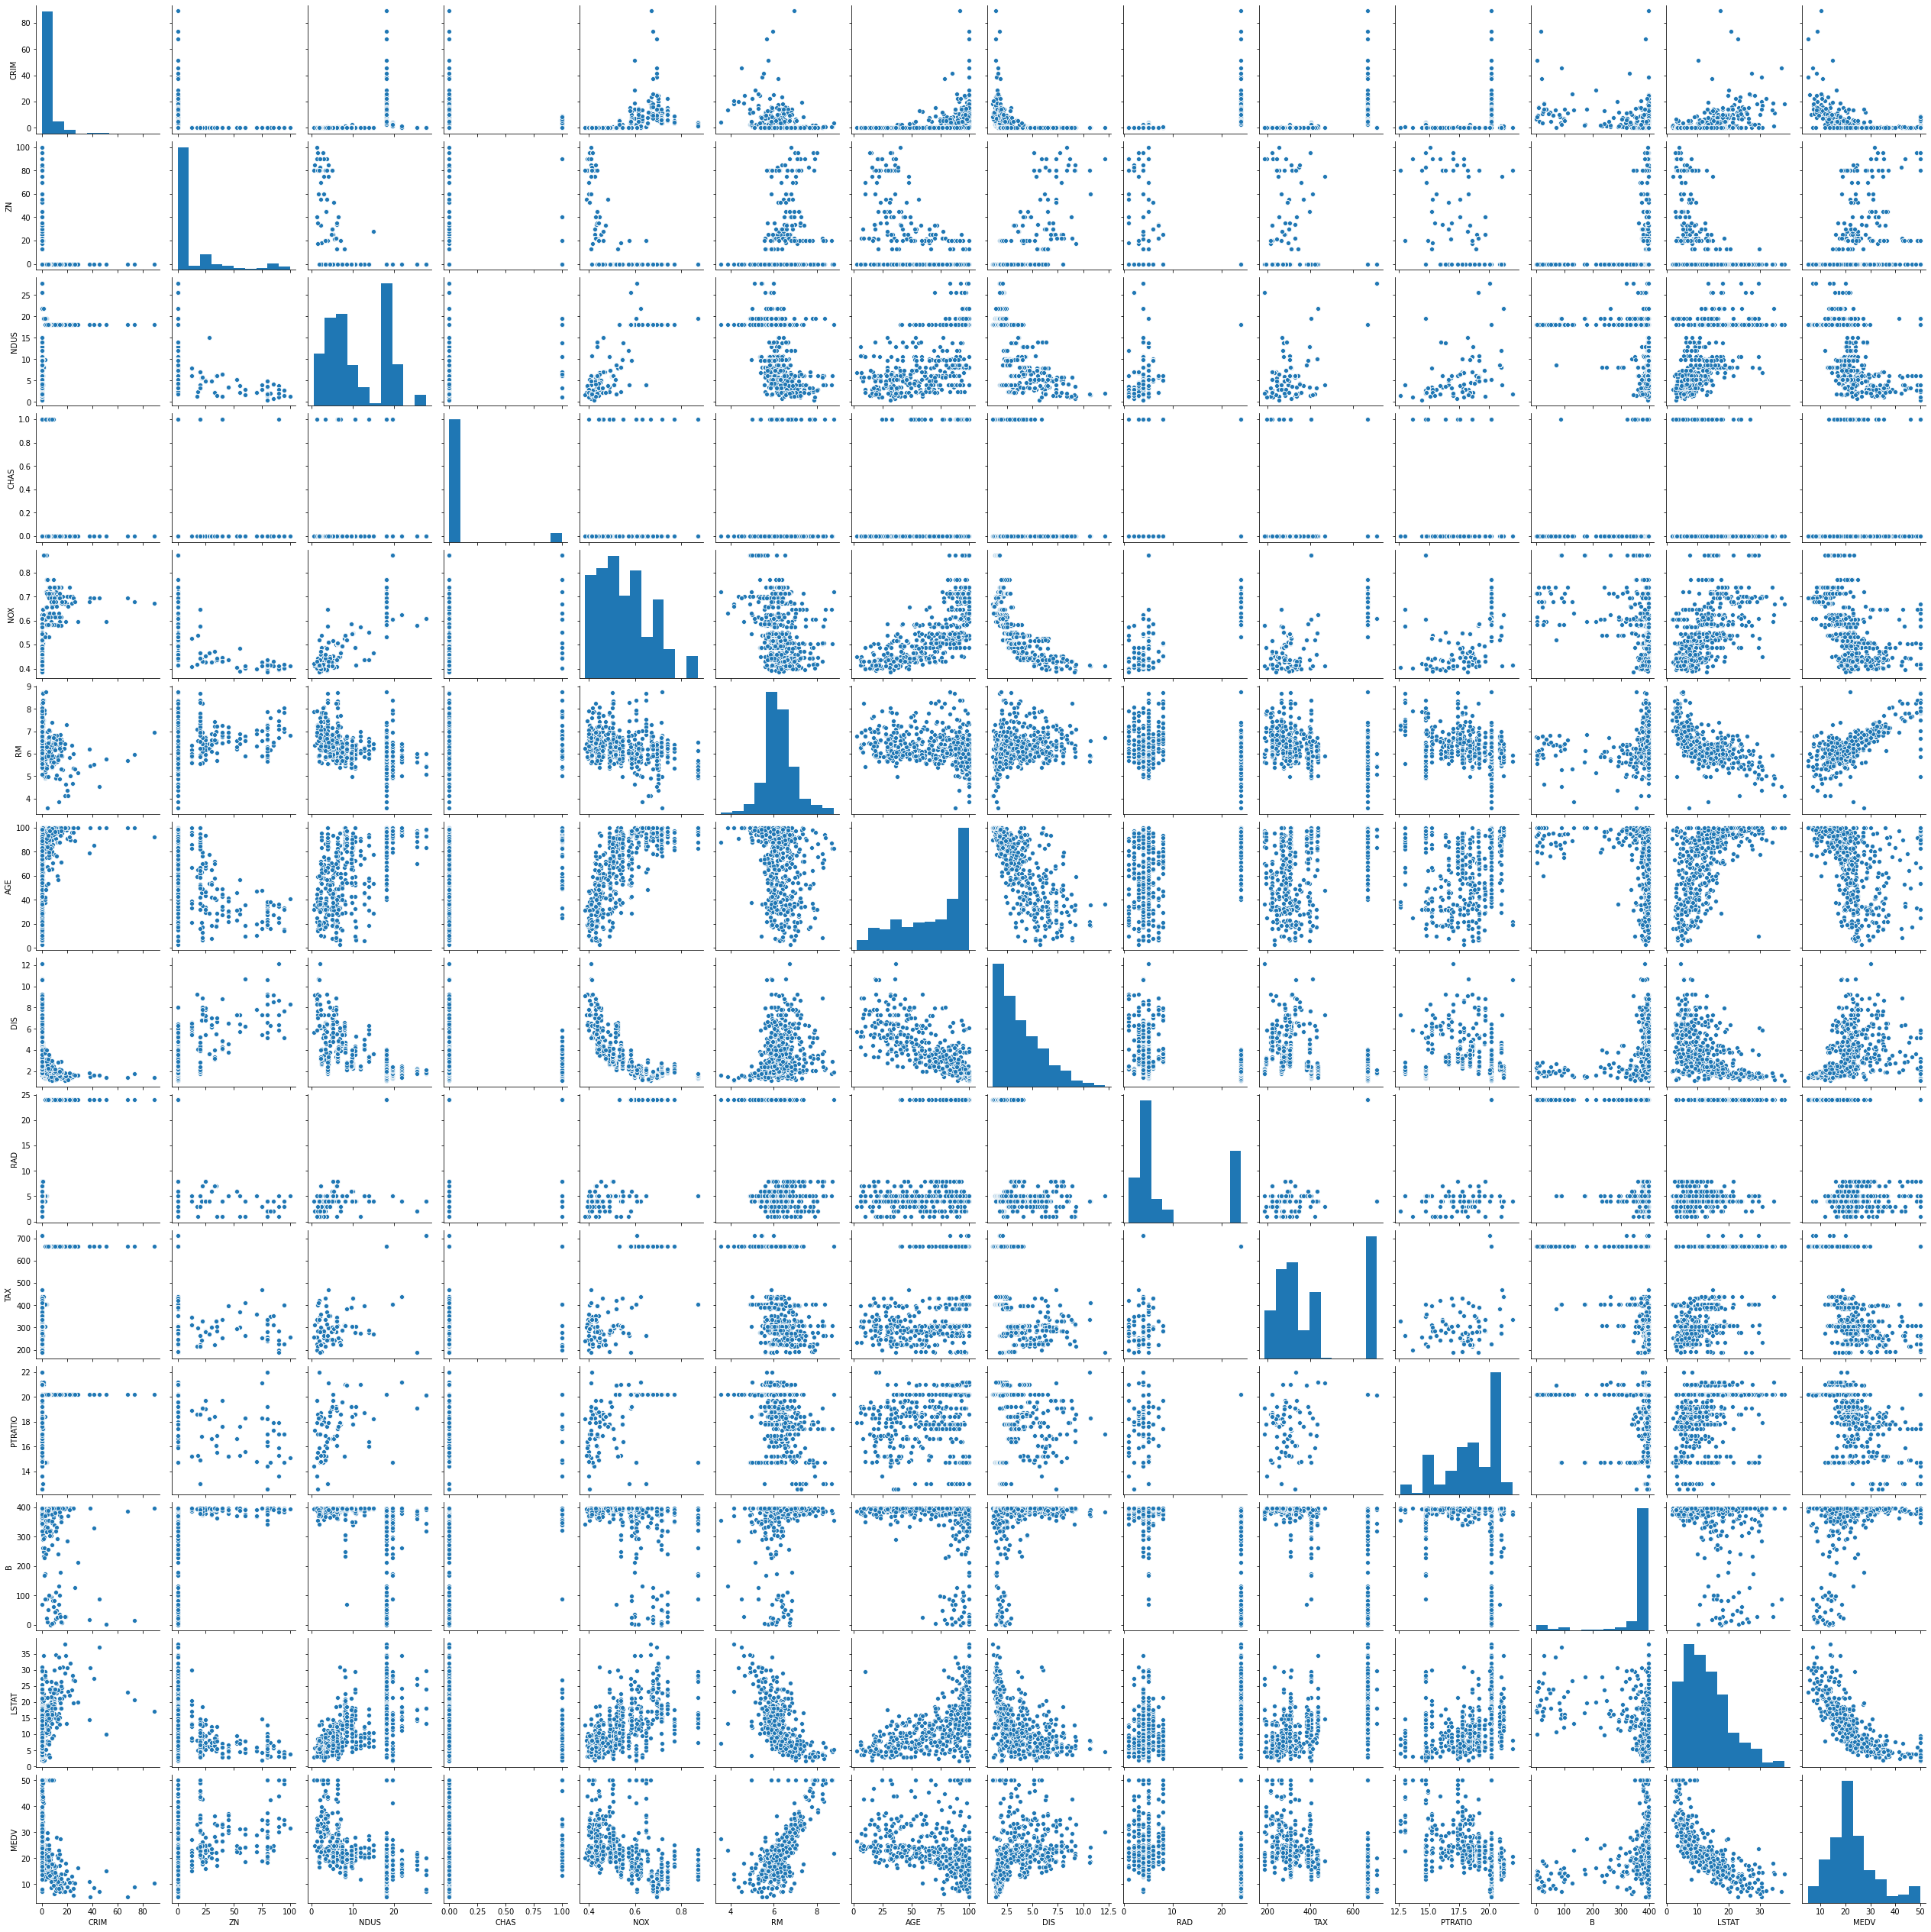

In [6]:
# Create the default pairplot
sns.pairplot(df)

In [7]:
#check the correlation between Median house values and all the other variables
medvCorr = df.corr()
medvCorr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
NDUS      -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

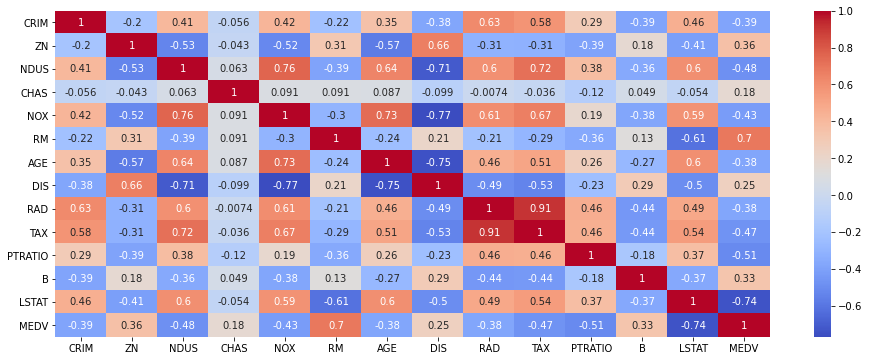

In [13]:
# for a clearer view of correlations plot a correlation heat map between all variables
import matplotlib.pyplot as plt
plt = plt.subplots(1, 1, figsize = (16 ,6))
plt6 = sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

Based on the correlation above plot some scatters for further exploration

0.7636514469209147

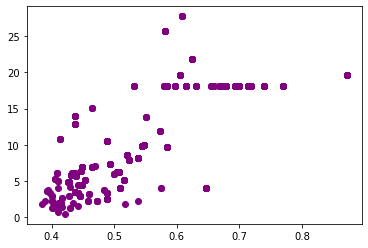

In [23]:
# check the relationship between NOX and NDUS
import matplotlib.pyplot as plt
plt.scatter(df.NOX, df.NDUS, c = "purple")
np.corrcoef(df.NOX,df.NDUS)[0,1]

0.7314701037859582

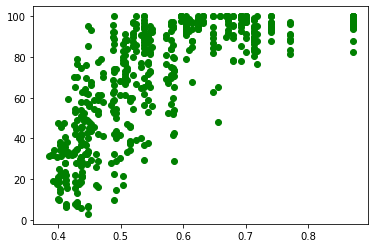

In [22]:
# check the relationship between NOX and Age 
plt.scatter(df.NOX, df.AGE, c = "green")
np.corrcoef(df.NOX,df.AGE)[0,1]

-0.7692301132258278

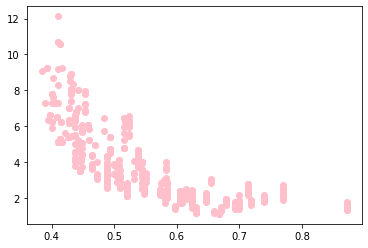

In [24]:
# # check the relationship between NOX and DIS
plt.scatter(df.NOX, df.DIS, c = "pink")
np.corrcoef(df.NOX,df.DIS)[0,1]

### Data Cleaning

In [29]:
# change the columns names for better description and easy use
df.columns=["crime_per_capita","zone","ndus","chas","nox","rooms","age","dis","rad","tax","ptratio","blacks", "lstat", "medv"]
df.head()

,crime_per_capita,zone,ndus,chas,nox,rooms,age,dis,rad,tax,ptratio,blacks,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


###### Description of all column variables in data set: 
###### crime_per_capita: per capita crime rate by town.
###### zone: proportion of residential land zoned for lots over 25,000 sq.ft.
###### ndus: proportion of non-retail business acres per town.
###### chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
###### nox: nitrogen oxides concentration (parts per 10 million).
###### rooms: average number of rooms per dwelling.
###### age: proportion of owner-occupied units built prior to 1940.
###### dis: weighted mean of distances to five Boston employment centres.
###### rad: index of accessibility to radial highways.
###### tax: full-value property-tax rate per ten thousand.
###### ptratio: pupil-teacher ratio by town.
###### blacks: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
###### lstat: lower status of the population (percent).
###### medv: median value of owner-occupied homes in \$1000s.

### Modeling

Calculate the correlation 

In [30]:
# IMPORT MODULES
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Based on the correlation above plot some scatters for further exploration

In [31]:
y = df.nox
X = df.dis
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the regression with OLS
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          4.23e-100
Time:                        08:34:17   Log-Likelihood:                 599.69
No. Observations:                 506   AIC:                            -1195.
Df Residuals:                     504   BIC:                            -1187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7153      0.007    105.257      0.0

In [32]:
X_prime = np.linspace(X.dis.min(), X.dis.max(), 100)
X_prime = sm.add_constant(X_prime)
y_hat = lr_model.predict(X_prime)

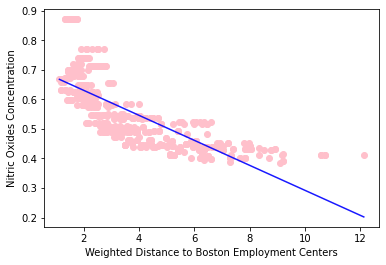

In [36]:
plt.scatter(X.dis,y, c = "pink")
plt.xlabel("Weighted Distance to Boston Employment Centers")
plt.ylabel("Nitric Oxides Concentration")
# now add the regression line in red
plt.plot(X_prime[:,1], y_hat, 'blue', alpha=0.9)

0.6953599470715389

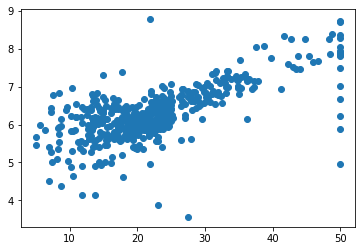

In [34]:
plt.scatter(df.medv, df.rooms)
np.corrcoef(df.medv,df.rooms)[0,1]

-0.7376627261740147

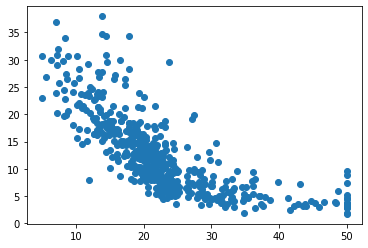

In [35]:
plt.scatter(df.medv, df.lstat)
np.corrcoef(df.medv,df.lstat)[0,1]

In [54]:
y = df.medv
X = df.rooms
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the regression with OLS
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.49e-74
Time:                        10:02:08   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [55]:
X_prime = sm.add_constant(X_prime)
y_hat = lr_model.predict(X_prime)

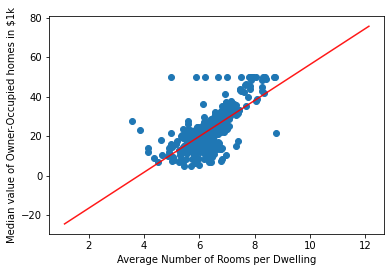

In [57]:
plt.scatter(X.rooms,y)
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Median value of Owner-Occupied homes in $1k")
# now add the regression line in red
plt.plot(X_prime[:,1], y_hat, 'red', alpha=0.9)

In [58]:
y = df.medv
X = df.lstat
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the regression with OLS
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           5.08e-88
Time:                        10:02:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [59]:
X_prime = np.linspace(X.lstat.min(), X.lstat.max(), 100)
X_prime = sm.add_constant(X_prime)
y_hat = lr_model.predict(X_prime)

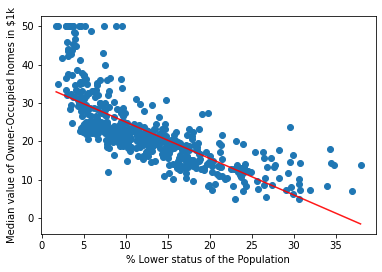

In [60]:
plt.scatter(X.lstat,y)
plt.xlabel("% Lower status of the Population")
plt.ylabel("Median value of Owner-Occupied homes in $1k")
# now add the regression line in red
plt.plot(X_prime[:,1], y_hat, 'red', alpha=0.9)

In [62]:
y = df.medv
X = df[['lstat','rooms']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the regression with OLS
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          7.01e-112
Time:                        10:03:56   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

In [63]:
y = df.medv
X = df[['lstat','rooms','tax']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the regression with OLS
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     308.7
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.52e-113
Time:                        10:04:33   Log-Likelihood:                -1575.7
No. Observations:                 506   AIC:                             3159.
Df Residuals:                     502   BIC:                             3176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4987      3.140     -0.159      0.8

In [65]:
y = df.nox
X = df[['ndus','age','dis']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the regression with OLS
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.4
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          2.62e-136
Time:                        10:04:52   Log-Likelihood:                 690.48
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4758      0.018     25.818      0.0

In [72]:
# split the data into X and y values
X = df.drop(['chas','medv'],axis=1) #CHAS variable shows good correlation.
y = df['medv']

#split train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [73]:
# Impute with KNNImputer
knn_impute=KNNImputer(n_neighbors=5,weights='distance')

# transform the Na with the strategy
X_train_filled_knn=knn_impute.fit_transform(X_train)
X_test_filled_knn=knn_impute.transform(X_test)

#Convert the arrays created back to Dataframe
X_train_filled_knn= pd.DataFrame(X_train_filled_knn,columns=X_train.columns)
X_test_filled_knn=pd.DataFrame(X_test_filled_knn,columns=X_test.columns)

#Perform the model
knn_imputed_model = LinearRegression()
knn_imputed_model.fit(X_train_filled_knn,y_train)
y_pred_knn=knn_imputed_model.predict(X_test_filled_knn)

#Check the RMSE score
RMSE_knn_model = np.sqrt(mean_squared_error(y_pred_knn,y_test))
print('This is the score of KNNImputer:', RMSE_knn_model)

This is the score of KNNImputer: 4.6580210527513355


In [74]:
# MEAN IMPUTER

# impute with the mean
mean_imputer = SimpleImputer(strategy='mean')

#transform the Na with the strategy
X_train_filled_mean=mean_imputer.fit_transform(X_train)
X_test_filled_mean = mean_imputer.transform(X_test)

#Convert the arrays created back to Dataframe
X_train_filled_mean = pd.DataFrame(X_train_filled_mean,columns=X_train.columns)
X_test_filled_mean = pd.DataFrame(X_test_filled_mean,columns=X_test.columns)

#Perform the model
mean_imputed_model = LinearRegression()
mean_imputed_model.fit(X_train_filled_mean,y_train)
y_pred_mean= mean_imputed_model.predict(X_test_filled_mean)

#Check the RMSE score
RMSE_mean_model = np.sqrt(mean_squared_error(y_pred_mean,y_test))
print('This is the RMSE of the score with Nas impute with the mean: ',RMSE_mean_model)

This is the RMSE of the score with Nas impute with the mean:  4.6580210527513355


In [75]:

#impute with the median
median_imputer=SimpleImputer(strategy='median')

# fill the Na with the strategy
X_train_filled_median=median_imputer.fit_transform(X_train)
X_test_filled_median=median_imputer.transform(X_test)

#Convert the arrays created back to Dataframe
X_train_filled_median=pd.DataFrame(X_train_filled_median,columns=X_train.columns)
X_test_filled_median=pd.DataFrame(X_test_filled_median,columns=X_test.columns)

#Perform the model
median_imputed_model=LinearRegression()
median_imputed_model.fit(X_train_filled_median,y_train)
y_pred_median=median_imputed_model.predict(X_test_filled_median)

#Check the RMSE score
RMSE_median_model=np.sqrt(mean_squared_error(y_pred_median,y_test))
print('This is the score for the median imputed Nas: ',RMSE_median_model)

This is the score for the median imputed Nas:  4.6580210527513355


References
https://www.kaggle.com/c/boston-housing